#                                   Análisis exploratorio

El propósito de este trabajo es ampliar mi experiencia práctica en el análisis de datos, particularmente con esta notebook: Deepnote.

La temática que elegí se vincula con la actividad agrícola y, concretamente, con el cultivo, la producción y el rendimiento de la soja en la Argentina, en un rango que abarca desde el año 1969 hasta el año 2019.

El dataset utilizado pertenece al Ministerio de Agricultura, Ganadería y Pesca. Descargué el mismo el día 6 de enero del 2024 del siguiente enlace: https://datos.magyp.gob.ar/dataset/soja-siembra-cosecha-produccion-rendimiento/archivo/3bfe4630-91e2-46cd-82ad-cf8dc94d3dfb

Luego de una breve limpieza de los datos, expondré algunos gráficos que permitirán visualizar la correlación entre las distintas variables ("superficie sembrada", "superficie cosechada", "producción en toneladas" y "rendimiento, kilogramos por hectárea") como, también, la evolución en Argentina del cultivo de la soja, en un rango de 50 años (1969-2019).

Por último, expondré una sucinta conclusión, derivada de la interrelación de los diversos campos del conjunto de datos.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/work/soja-anual.csv') 
df

,Tiempo,Superficie sembrada ha,Superficie cosechada ha,prod toneladas,Rendimiento kg x ha
0,1969,30470,25970,26800,1032
1,1970,37700,36330,59000,1624
2,1971,79800,68000,78000,1147
3,1972,169360,156950,271904,1732
4,1973,376600,344340,495880,1440
5,1974,369500,355940,485000,1363
6,1975,442500,433500,695000,1603
7,1976,710000,660000,1400000,2121
8,1977,1200000,1150000,2500000,2174
9,1978,1640000,1600000,3700000,2313


In [ ]:
df.head(5)

,Tiempo,Superficie sembrada ha,Superficie cosechada ha,prod toneladas,Rendimiento kg x ha
0,1969,30470,25970,26800,1032
1,1970,37700,36330,59000,1624
2,1971,79800,68000,78000,1147
3,1972,169360,156950,271904,1732
4,1973,376600,344340,495880,1440


In [ ]:
df.describe()

,Tiempo,Superficie sembrada ha,Superficie cosechada ha,prod toneladas,Rendimiento kg x ha
count,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,51.000000
mean,1994.000000,8.632682e+06,8.385569e+06,2.172153e+07,2256.137255
std,14.866069,7.108960e+06,6.905377e+06,2.003794e+07,527.796060
min,1969.000000,3.047000e+04,2.597000e+04,2.680000e+04,1032.000000
25%,1981.500000,2.231000e+06,2.155350e+06,4.075000e+06,1942.000000
50%,1994.000000,6.002155e+06,5.913415e+06,1.171990e+07,2264.000000
75%,2006.500000,1.634096e+07,1.613505e+07,3.919237e+07,2655.000000
max,2019.000000,2.056223e+07,1.959087e+07,6.139828e+07,3334.000000


In [ ]:
df.dtypes

Tiempo                     int64
Superficie sembrada ha     int64
Superficie cosechada ha    int64
prod toneladas             int64
Rendimiento kg x ha        int64
dtype: object

In [ ]:
print(f'Original: {df.Tiempo.count()} filas')
duplicate_rows_df = df[df.duplicated()]
print(f'Cantidad de filas duplicadas: {duplicate_rows_df.Tiempo.count()}')

Original: 51 filas
Cantidad de filas duplicadas: 0


In [ ]:
df = df.rename(columns = {
    "Tiempo":"Año",
    "Superficie sembrada ha":"Superficie sembrada (ha)",
    "Superficie cosechada ha":"Superficie cosechada (ha)",  
    "prod toneladas":"Producción en toneladas",
    "Rendimiento kg x ha":"Rendimiento (kg x ha)", 
    })
df.columns

Index(['Año', 'Superficie sembrada (ha)', 'Superficie cosechada (ha)',
       'Producción en toneladas', 'Rendimiento (kg x ha)'],
      dtype='object')

In [ ]:
# Encontrar los valores nulos
print(df.isnull().sum())

Año                          0
Superficie sembrada (ha)     0
Superficie cosechada (ha)    0
Producción en toneladas      0
Rendimiento (kg x ha)        0
dtype: int64


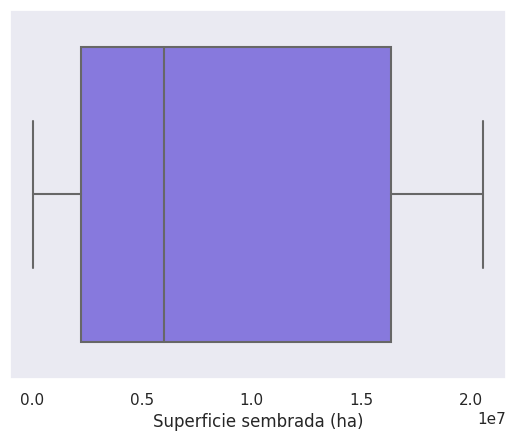

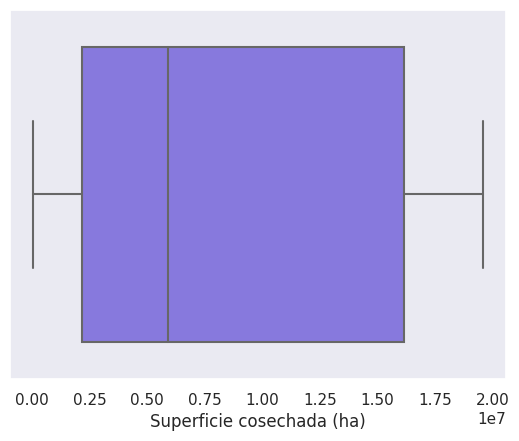

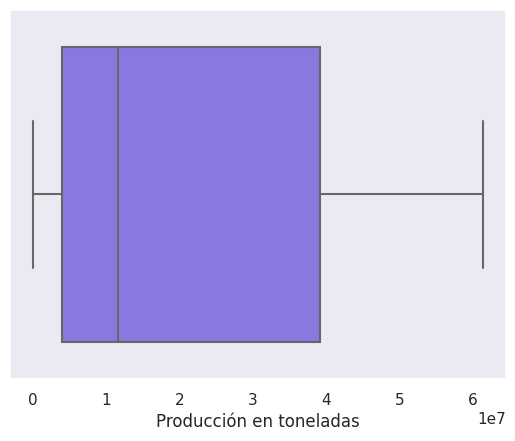

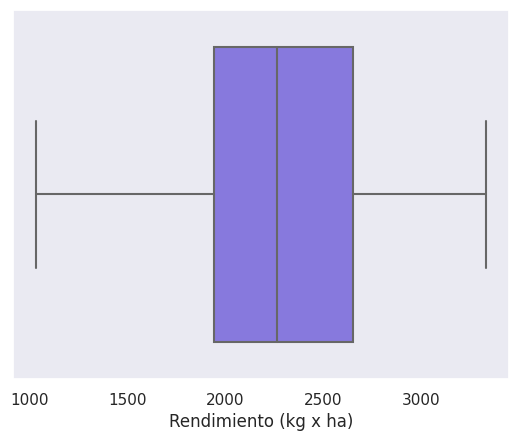

In [ ]:
#DETECTAR LOS OUTLIERS
sns.set(style='dark')
sns.boxplot(x=df['Superficie sembrada (ha)'], color='mediumslateblue')
plt.show()
sns.boxplot(x=df['Superficie cosechada (ha)'], color='mediumslateblue')
plt.show()
sns.boxplot(x=df['Producción en toneladas'], color='mediumslateblue')
plt.show()
sns.boxplot(x=df['Rendimiento (kg x ha)'], color='mediumslateblue')
plt.show()

In [ ]:
# Correlaciones entre los datos (mapas de calor)

df2 = df.drop(['Año'], axis=1)

c = df2.corr()
print(c)

                           Superficie sembrada (ha)  \
Superficie sembrada (ha)                   1.000000   
Superficie cosechada (ha)                  0.999499   
Producción en toneladas                    0.976835   
Rendimiento (kg x ha)                      0.775684   

                           Superficie cosechada (ha)  Producción en toneladas  \
Superficie sembrada (ha)                    0.999499                 0.976835   
Superficie cosechada (ha)                   1.000000                 0.980078   
Producción en toneladas                     0.980078                 1.000000   
Rendimiento (kg x ha)                       0.784305                 0.842713   

                           Rendimiento (kg x ha)  
Superficie sembrada (ha)                0.775684  
Superficie cosechada (ha)               0.784305  
Producción en toneladas                 0.842713  
Rendimiento (kg x ha)                   1.000000  


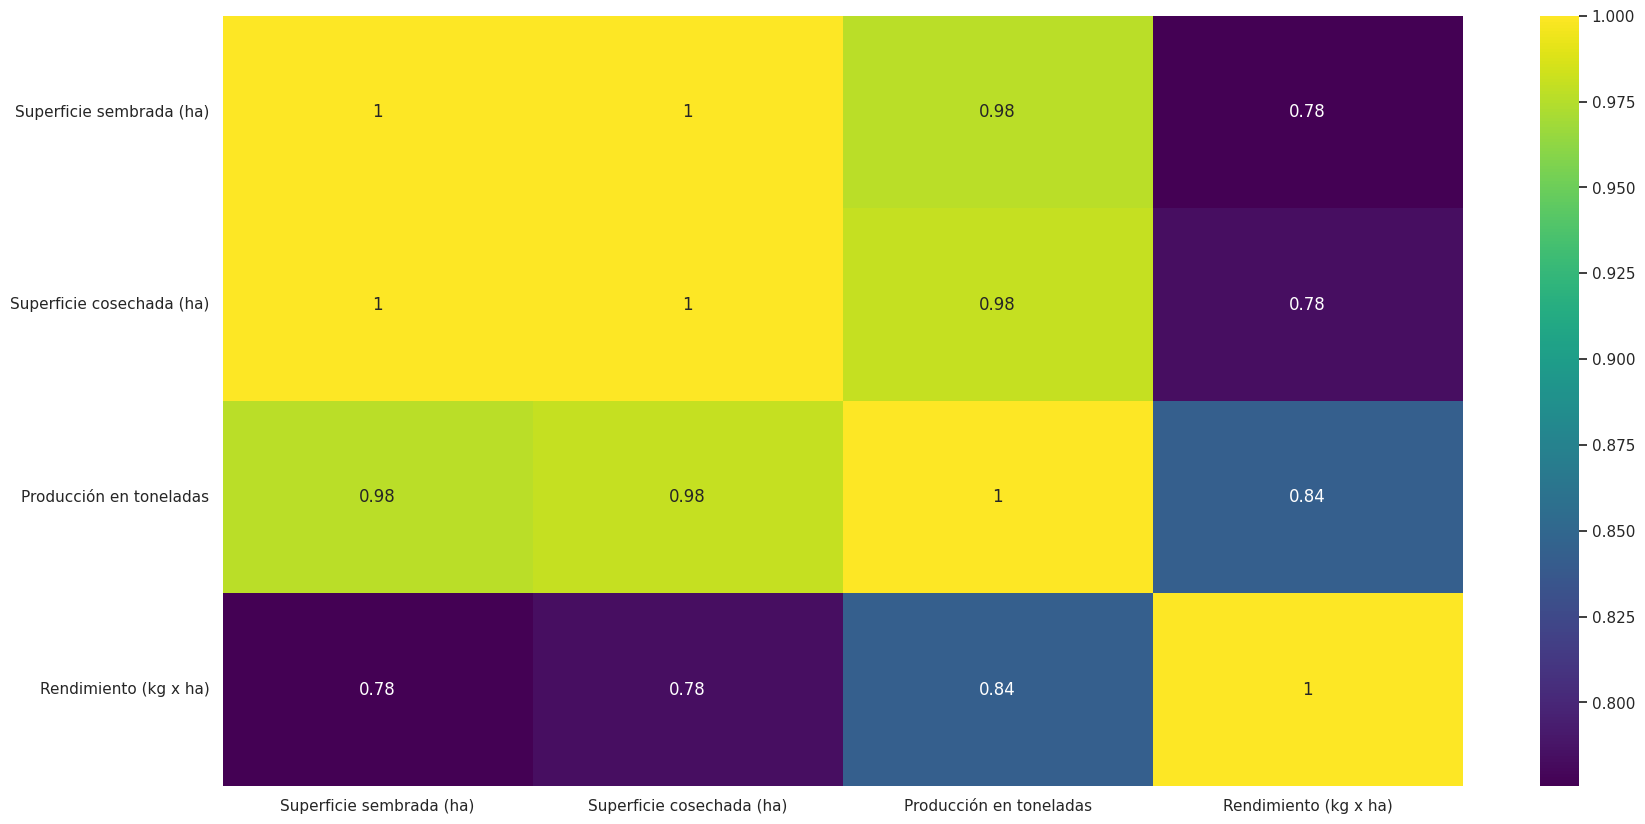

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(c, cmap="viridis", annot=True)
plt.show()

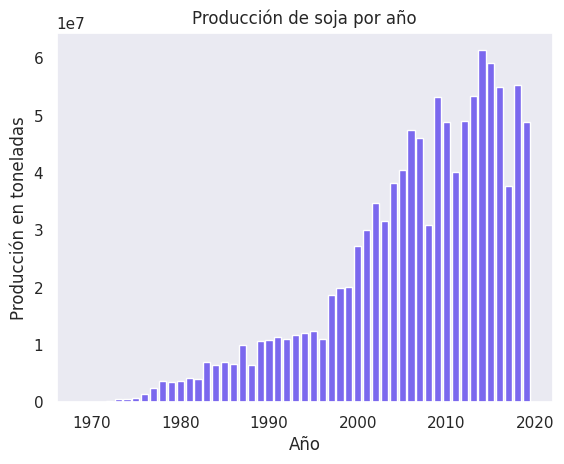

In [ ]:
plt.bar(df['Año'], df['Producción en toneladas'], color='mediumslateblue')
plt.title('Producción de soja por año')
plt.xlabel('Año')
plt.ylabel('Producción en toneladas')
plt.show()

### Conclusiones finales

Para comenzar, puede apreciarse que no existen valores nulos, ni tampoco valores anómalos.

Luego, en lo concerniente a las correlaciones:

- existe una correlación positiva perfecta entre las variables "superficie sembrada" y "superficie cosechada".

- existe una alta correlación positiva entre las variables "producción en toneladas" y "rendimiento".

- existe una correlación positiva (también alta, sólo algo menor que la anterior) entre las variables "rendimiento" y "superficie sembrada" y entre las variables "rendimiento" y  "superficie cosechada".

Finalmente, en lo concerniente a la evolución anual de este cultivo, puede vislumbrarse un aumento constante, salvo en determinados años (lo que podría deberse a condiciones de sequía, económicas y/o a tributarias, presentes en el país).

María Inés Abarrategui F.

Fecha: 31 de enero, 2024.

https://www.linkedin.com/in/mariainesabarrateguif

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ea52354-1470-4ae1-952e-8bfc8b84c724' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>